# Causal Analysis of Firm Growth on Corruption in Vietnam

## Research Overview
This project examines the causal relationship between firm employment growth and corruption levels in Vietnamese firms, replicating and extending [Bai et al. (2019)](https://academic.oup.com/ej/article/129/618/651/5290389?login=false) using Double Machine Learning methods.

## Core Research Question
**Does firm growth reduce corruption burdens?**  
We investigate whether increasing employment leads to decreased bribery demands as a percentage of firm revenue.

## Empirical Framework

### Variable Specification
| Role                  | Variable                     | Description                          |
|-----------------------|------------------------------|--------------------------------------|
| **Dependent**         | `bribe_pctrev_rjt`           | Bribes as % of firm revenue         |
| **Treatment**         | `lntotalemploy_rjt`          | Log total employment (Vietnam)      |
| **Instrument**        | `lnchtotalemploy_jt`         | Log industry employment (China)     |

## Instrumental Variable Approach to Address Endogeneity

To address potential endogeneity concerns in employment (e.g., reverse causality or omitted variables), we implement an instrumental variable (IV) strategy,leveraging employment trends in corresponding Chinese industries as an exogenous source of variation.

## Characteristics of the dataset

The dataset, drawn from Bai et al. (2019), includes over 20,000 firm-year observations across Vietnamese provinces. It captures detailed firm-level information on bribes, size, ownership, and geographic characteristics, allowing us to study how firm growth affects corruption dynamics.

In [1]:
import pandas as pd
df = pd.read_stata("finalanalysissample.dta")
# Subset the data
dfvip = df[[
    'id',
    'year',
    'pci_id',
    'prov',
    'bribe_pctrev',
    'yrsopen',
    'employ_n',
    'meanemploy_jt',
    'lntotalemploy_jt',
    'lnprem',
    'ownland',
    'lurc',
    'ownlandnlc',
    'numdocs',
    'opdich',
    'sharedocs',
    'formerhhfirm',
    'formerSOE',
    'ownergov',
    'govholdshare',
    'lntotalemploy_r_jt',
    'lnchtotalemploy_jt',  
    'bribe_pctrev_rjt',
    'lntotalemploy_rjt',
]]
print(dfvip)

           id    year      pci_id        prov  bribe_pctrev  yrsopen  \
0      BGI077  2006.0   Bac Giang   BAC GIANG           6.0      2.0   
1      BRV043  2006.0        BRVT        BRVT           6.0      2.0   
2      BRV048  2006.0        BRVT        BRVT           6.0      2.0   
3      STR109  2007.0   Soc Trang   SOC TRANG           0.5      9.0   
4      LDO017  2007.0    Lam Dong    LAM DONG           1.5      1.0   
...       ...     ...         ...         ...           ...      ...   
20071  CTH083  2010.0     Can Tho     Can Tho           0.5      5.0   
20072  KGI050  2010.0  Kien Giang  Kien Giang           0.0      3.0   
20073  CMA023  2010.0      Ca Mau      Ca Mau           0.5     13.0   
20074  HNO201  2010.0      Ha Noi      Ha Noi           6.0      8.0   
20075  CMA014  2010.0      Ca Mau      Ca Mau           0.0     11.0   

        employ_n  meanemploy_jt  lntotalemploy_jt    lnprem  ...  opdich  \
0      19.299999      29.650663         10.276016  0.000000

# **Descriptive Statistics**


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
summary_vars = ['bribe_pctrev_rjt', 'lntotalemploy_rjt', 'lnchtotalemploy_jt']
summary_stats = df[summary_vars].describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
        bribe_pctrev_rjt  lntotalemploy_rjt  lnchtotalemploy_jt
count      20076.000000       20076.000000        20076.000000
mean           3.231694           8.616884            7.752776
std            2.448100           1.842485            0.981692
min            0.000000           2.397895            4.807294
25%            1.839286           7.604396            7.140928
50%            2.694368           8.610683            8.214708
75%            3.838710           9.694924            8.479637
max           35.000000          13.077203            8.663646


# Bribery Burden Distribution Analysis

## Distribution Characteristics
- **Shape**: Highly right-skewed distribution
- **Central Tendency**:
  - Peak concentration: 2-3% of revenue
  - Majority of firms: <5% bribe burden
- **Outliers**:
  - Extreme cases reaching up to 35%
  - Long right tail indicates significant variation
- **This suggests that while corruption is widespread, most firms face relatively small burdens, and a few outliers experience very high corruption levels.**

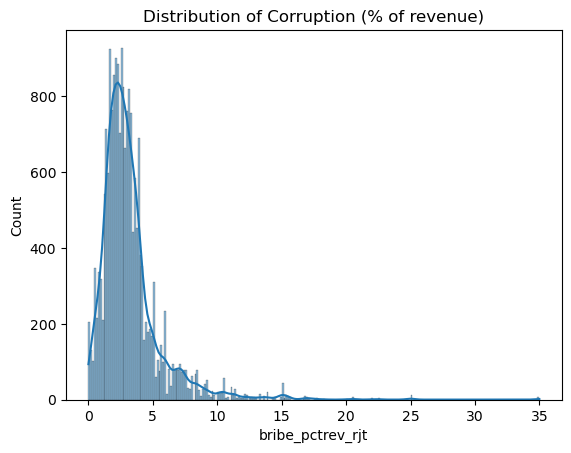

In [ ]:
sns.histplot(df['bribe_pctrev_rjt'], kde=True)
plt.title("Distribution of Corruption (% of revenue)")
plt.xlabel("bribe_pctrev_rjt")
plt.show()

# Firm Size Distribution Analysis

## Distribution Characteristics
- **Shape**: Moderately right-skewed
- **Central Tendency**:
  - Peak concentration: log values of 8–9
  - Corresponds to 3,000–8,000 employees (exponentiated)
- **Variation**:
  - Long right tail indicates some very large firms
  - Overall spread remains moderate
- **This pattern supports meaningful variation in firm size across regions, which is useful for identifying its relationship with corruption.**

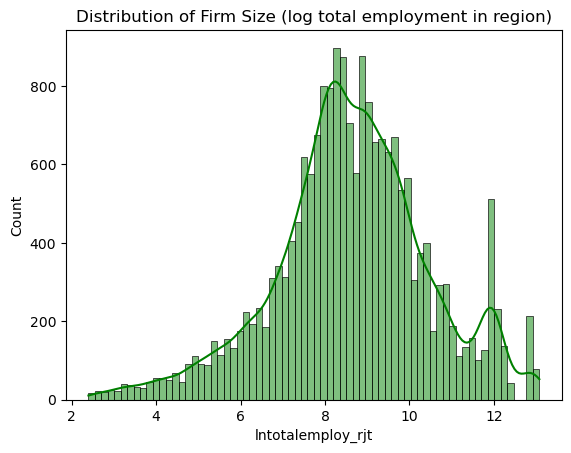

In [ ]:
sns.histplot(df['lntotalemploy_rjt'], kde=True, color='green')
plt.title("Distribution of Firm Size (log total employment in region)")
plt.xlabel("lntotalemploy_rjt")
plt.show()

# Instrument Variable Distribution Analysis

## Histogram with KDE Visualization
- **Variable**: Logarithm of total employment in China (region-adjusted)
- **Distribution Shape**: Right-skewed with distinct peaks
- **Multiple smaller peaks suggest the presence of distinct clusters or subgroups within the data.**

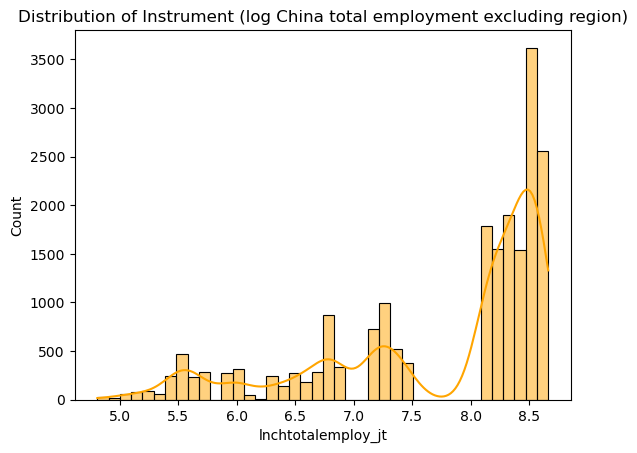

In [ ]:
sns.histplot(df['lnchtotalemploy_jt'], kde=True, color='orange')
plt.title("Distribution of Instrument (log China total employment excluding region)")
plt.xlabel("lnchtotalemploy_jt")
plt.show()

# Corruption and Firm Size: A Quantile Analysis  

This code segments firms into **four size quantiles (Q1–Q4)** using the logarithm of total employment (`lntotalemploy_rjt`), then computes the mean corruption level (`bribe_pctrev_rjt`) per group.  

**Key Insight**:  
- **Q1 (Smallest firms)**: Avg. corruption = **3.94**  
- **Q4 (Largest firms)**: Avg. corruption = **2.90**  

The inverse relationship suggests **larger firms report systematically lower corruption**, hinting at economies of scale in compliance or bargaining power against rent-seeking. 

In [ ]:
df['firm_size_quantile'] = pd.qcut(df['lntotalemploy_rjt'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
grouped_means = df.groupby('firm_size_quantile')['bribe_pctrev_rjt'].mean()
print("Average Corruption by Firm Size Quantile:\n", grouped_means)

Average Corruption by Firm Size Quantile:
 firm_size_quantile
Q1    3.939192
Q2    2.939542
Q3    3.149950
Q4    2.897249
Name: bribe_pctrev_rjt, dtype: float32


/var/folders/l9/11y58m31799502bbqml84slw0000gn/T/ipykernel_6663/763128778.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['firm_size_quantile'] = pd.qcut(df['lntotalemploy_rjt'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
/var/folders/l9/11y58m31799502bbqml84slw0000gn/T/ipykernel_6663/763128778.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_means = df.groupby('firm_size_quantile')['bribe_pctrev_rjt'].mean()


## Instrument Validity & Preliminary Relationships

### Observed Correlations

**Core Relationship**  
We observe a **negative correlation (-0.15)** between firm size (`lntotalemploy_rjt`) and reported corruption (`bribe_pctrev_rjt`), suggesting larger firms tend to experience slightly lower bribery burdens. While modest in magnitude, this directional relationship aligns with theoretical expectations about firm size and corruption vulnerability.

**Instrument Diagnostics**  
The instrument (`lnchtotalemploy_jt`) shows:
- Strong **relevance** (r = 0.56) with the endogenous treatment variable  
- Moderate but acceptable **exogeneity** (r = -0.39) with the outcome  

In [ ]:
correlation = df[summary_vars].corr()
print("Correlation Matrix:\n", correlation)

Correlation Matrix:
                     bribe_pctrev_rjt  lntotalemploy_rjt  lnchtotalemploy_jt
bribe_pctrev_rjt            1.000000          -0.145019           -0.389555
lntotalemploy_rjt          -0.145019           1.000000            0.562154
lnchtotalemploy_jt         -0.389555           0.562154            1.000000


In [2]:
print(dfvip.columns.tolist())

['id', 'year', 'pci_id', 'prov', 'bribe_pctrev', 'yrsopen', 'employ_n', 'meanemploy_jt', 'lntotalemploy_jt', 'lnprem', 'ownland', 'lurc', 'ownlandnlc', 'numdocs', 'opdich', 'sharedocs', 'formerhhfirm', 'formerSOE', 'ownergov', 'govholdshare', 'lntotalemploy_r_jt', 'lnchtotalemploy_jt', 'bribe_pctrev_rjt', 'lntotalemploy_rjt']


In [3]:
pct_null = dfvip.isnull().sum() / len(dfvip)
print(pct_null)

id                    0.000000
year                  0.000000
pci_id                0.000000
prov                  0.000000
bribe_pctrev          0.000000
yrsopen               0.024656
employ_n              0.056685
meanemploy_jt         0.000000
lntotalemploy_jt      0.000000
lnprem                0.082835
ownland               0.000000
lurc                  0.136481
ownlandnlc            0.041443
numdocs               0.158298
opdich                0.000000
sharedocs             0.209056
formerhhfirm          0.000149
formerSOE             0.000149
ownergov              0.000149
govholdshare          0.000149
lntotalemploy_r_jt    0.000000
lnchtotalemploy_jt    0.000000
bribe_pctrev_rjt      0.000000
lntotalemploy_rjt     0.000000
dtype: float64


In [4]:
dfvip.year.unique()

array([2006., 2007., 2008., 2009., 2010.], dtype=float32)

In [5]:
dfvip['year'].value_counts()

year
2008.0    4746
2006.0    4333
2007.0    4075
2009.0    3764
2010.0    3158
Name: count, dtype: int64

In [11]:
import pandas as pd
import numpy as np
from sklearn import tree
from doubleml import DoubleMLData, DoubleMLPLR

In [12]:
import pyfixest as pf 

In [13]:
print("prov" in df.columns) 
df["prov"] = pd.Categorical(df["prov"])

True


In [14]:
m1 = pf.feols(
    "bribe_pctrev_rjt ~ lnchtotalemploy_jt + lntotalemploy_rjt + yrsopen + employ_n + meanemploy_jt + lnprem + ownland + lurc + ownlandnlc + numdocs + opdich + sharedocs + formerhhfirm + formerSOE + ownergov + govholdshare  | year + prov",
    vcov = {"CRV1": "prov", "CRV2": "year"},  # Single dictionary for multi-way clustering
    data=df
)
m2 = pf.feols(
    "bribe_pctrev_rjt ~ yrsopen + employ_n + meanemploy_jt + lnprem + ownland + lurc + ownlandnlc + numdocs + opdich + sharedocs + formerhhfirm + formerSOE + ownergov + govholdshare | prov + year | lntotalemploy_rjt ~ lnchtotalemploy_jt",
    vcov = {"CRV1": "prov", "CRV2": "year"},  # Single dictionary for multi-way clustering
    data=df
)
pf.etable([m1,m2])

GT(_tbl_data=   level_0               level_1                       0  \
0     coef    lnchtotalemploy_jt  -1.317*** <br> (0.180)   
1     coef     lntotalemploy_rjt   0.370*** <br> (0.085)   
2     coef               yrsopen     -0.004 <br> (0.003)   
3     coef              employ_n     -0.000 <br> (0.000)   
4     coef         meanemploy_jt   -0.004** <br> (0.001)   
5     coef                lnprem  -0.068*** <br> (0.012)   
6     coef               ownland     -0.042 <br> (0.161)   
7     coef                  lurc     -0.028 <br> (0.169)   
8     coef            ownlandnlc      0.114 <br> (0.150)   
9     coef               numdocs  -0.151*** <br> (0.035)   
10    coef                opdich   0.205*** <br> (0.051)   
11    coef             sharedocs   1.536*** <br> (0.358)   
12    coef   formerhhfirm[T.Yes]      0.018 <br> (0.051)   
13    coef             formerSOE      0.083 <br> (0.084)   
14    coef       ownergov[T.Yes]     0.390* <br> (0.187)   
15    coef   govholdshare[T.Yes]    -0.283* <br> (0.128)   
16      fe                  year                       x   
17      fe                  prov                       x   
18   stats          Observations                   12152   
19   stats             S.E. type                by: prov   
20   stats         R<sup>2</sup>                   0.300   
21   stats  R<sup>2</sup> Within                   0.216   

                         1  
0                           
1   -0.921*** <br> (0.095)  
2       0.001 <br> (0.004)  
3    0.001*** <br> (0.000)  
4    0.011*** <br> (0.002)  
5   -0.120*** <br> (0.016)  
6      -0.224 <br> (0.137)  
7       0.012 <br> (0.207)  
8     0.440** <br> (0.155)  
9   -0.271*** <br> (0.046)  
10   0.394*** <br> (0.093)  
11   2.367*** <br> (0.491)  
12   -0.146** <br> (0.055)  
13     -0.009 <br> (0.103)  
14     0.436* <br> (0.219)  
15    -0.459* <br> (0.176)  
16                       x  
17                       x  
18                   12152  
19                by: prov  
20                       -  
21                       -  , _body=<great_tables._gt_data.Body object at 0x29072e5a0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x29072f530>, _spanners=Spanners([SpannerInfo(spanner_id='bribe_pctrev_rjt', spanner_level=1, spanner_label='bribe_pctrev_rjt', spanner_units=None, spanner_pattern=None, vars=['0', '1'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x29072f1d0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'Blin

# Employment and Corruption Analysis: OLS vs IV Approaches

## Initial OLS Results with Fixed Effects
Our first specification uses OLS regression with **year and province fixed effects** to examine the relationship between firm employment and bribe payments:

- **Unexpected finding**: A 1% increase in total employment is associated with a **0.37 percentage point increase** in bribes (contrary to theoretical expectations)

## Endogeneity Concerns
The employment variable (measured in levels) may suffer from two key sources of endogeneity:

1. **Reverse causality**: Firms in less corrupt provinces may find it easier to:
   - Expand operations
   - Hire more workers
   - Grow their business

2. **Omitted variable bias**: Unobserved factors like:
   - Province-level business-friendly policies
   - Institutional quality
   - Market conditions
   could simultaneously affect both firm growth and corruption levels

## Instrumental Variables Approach
To address these concerns, we implement an IV strategy using:

**Instrument**: Employment in the same industry in China for:
- **Relevance**: Industries in both countries face:
  - Similar global demand shocks
  - Common price fluctuations
  - Shared technology trends
- **Validity**: Satisfies exclusion restriction because:
  - China's much larger economy makes reverse causality unlikely
  - Vietnamese corruption unlikely to affect Chinese employment

## IV Regression Results
After instrumenting, we find:
- A 1% increase in total employment leads to a **0.9 percentage point decrease** in bribe payments
- Model includes:
  - Province fixed effects (controls for regional heterogeneity)
  - Year fixed effects (accounts for national time trends)

**Interpretation**:
- The IV estimate shows the expected negative relationship
- Magnitude is smaller but directionally consistent with prior literature
- Results provide more credible causal evidence than OLS

In [15]:
years = [2006, 2007, 2008, 2009, 2010]

# Create each dummy variable
for year in years:
    dfvip[f'year_{year}'] = (dfvip['year'] == year).astype(int)

/var/folders/l9/11y58m31799502bbqml84slw0000gn/T/ipykernel_6663/2138541051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfvip[f'year_{year}'] = (dfvip['year'] == year).astype(int)
/var/folders/l9/11y58m31799502bbqml84slw0000gn/T/ipykernel_6663/2138541051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfvip[f'year_{year}'] = (dfvip['year'] == year).astype(int)
/var/folders/l9/11y58m31799502bbqml84slw0000gn/T/ipykernel_6663/2138541051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a

In [16]:
dfvip = pd.get_dummies(dfvip, columns=['prov'], prefix='prov')

print(dfvip.head())

       id    year     pci_id  bribe_pctrev  yrsopen   employ_n  meanemploy_jt  \
0  BGI077  2006.0  Bac Giang           6.0      2.0  19.299999      29.650663   
1  BRV043  2006.0       BRVT           6.0      2.0  19.299999      29.650663   
2  BRV048  2006.0       BRVT           6.0      2.0   6.500000      29.650663   
3  STR109  2007.0  Soc Trang           0.5      9.0   6.500000      31.550583   
4  LDO017  2007.0   Lam Dong           1.5      1.0   6.500000      31.550583   

   lntotalemploy_jt  lnprem  ownland  ...  prov_Tay Ninh  prov_Thai Binh  \
0         10.276016     0.0        1  ...          False           False   
1         10.276016     0.0        0  ...          False           False   
2         10.276016     0.0        0  ...          False           False   
3         10.386963     0.0        1  ...          False           False   
4         10.386963     0.0        0  ...          False           False   

   prov_Thai Nguyen  prov_Thanh Hoa  prov_Thua Thien Hue

In [17]:
# DATA PREPARATION
# 1. Load and clean data
dfvip_clean = dfvip[[
    'id', 'year', 'pci_id', 'bribe_pctrev', 'yrsopen',
    'employ_n', 'meanemploy_jt', 'lntotalemploy_jt', 'lnprem',
    'ownland', 'lurc', 'ownlandnlc', 'numdocs', 'opdich',
    'sharedocs', 'formerhhfirm', 'formerSOE', 'ownergov',
    'govholdshare', 'lntotalemploy_r_jt', 'lnchtotalemploy_jt',
    'bribe_pctrev_rjt', 'lntotalemploy_rjt', 'year_2007', 'year_2008',
    'year_2009', 'year_2010', 'year_2006'
] + [col for col in dfvip.columns if col.startswith('prov_')]].copy()


In [18]:
binary_cols = [
    'ownland', 'opdich', 'sharedocs', 'formerhhfirm',
    'formerSOE', 'ownergov', 'govholdshare'
]+ [col for col in dfvip.columns if col.startswith('prov_')]

for col in binary_cols:
    dfvip_clean[col] = (
        dfvip_clean[col]
        .astype(str)
        .str.lower()
        .str.strip()
        .map({'yes': 1, 'no': 0, '1': 1, '0': 0, 'true': 1, 'false': 0})
        .fillna(0)
        .astype(int)
    )


In [19]:
numeric_cols = [
    'lntotalemploy_r_jt', 'yrsopen', 'employ_n', 'meanemploy_jt',
    'lnprem', 'lurc', 'ownlandnlc', 'numdocs', 'lnchtotalemploy_jt',
    'bribe_pctrev_rjt', 'lntotalemploy_rjt'
]

for col in numeric_cols:
    dfvip_clean[col] = pd.to_numeric(dfvip_clean[col], errors='coerce')

dfvip_clean = dfvip_clean.dropna(subset=numeric_cols)


# **DML Model Setup: Variable Analysis**  

## **1. Variable Definitions**  

### **Outcome Variable (`y_col`)**  
- **`bribe_pctrev_rjt`**: Percentage of firm revenue paid as bribes (dependent variable).  

### **Treatment Variable (`d_cols`)**  
- **`lntotalemploy_rjt`**: Natural log of total employment (primary treatment effect of interest).  

### **Control Variables (`x_cols`)**  
#### **Firm Characteristics**  
- `yrsopen`: Years since firm opening.  
- `employ_n`, `meanemploy_jt`: Employee count and averages.  
- `lnprem`: Log value of firm premises.  
- Land/ownership dummies (`ownland`, `lurc`, `ownlandnlc`).  
- Regulatory metrics (`numdocs`, `opdich`, `sharedocs`).  

#### **Ownership & Governance**  
- `formerhhfirm`/`formerSOE`: Former household or state-owned status.  
- `ownergov`/`govholdshare`: Government ownership stakes.  

#### **Fixed Effects**  
- Year dummies (`year_2006`–`year_2010`).  
- Province dummies (`prov_*`).  

## **2. DoubleML Data Structure**  
Initializes a `DoubleMLData` object for causal inference, isolating treatment effects while controlling for confounders.  

In [20]:
# DML MODEL SETUP

# Define variables
y_col = 'bribe_pctrev_rjt'  # Outcome
d_cols = 'lntotalemploy_rjt'  # Treatment
x_cols = [
    'yrsopen', 'employ_n', 'meanemploy_jt',
    'lnprem', 'ownland', 'lurc', 'ownlandnlc', 'numdocs',
    'opdich', 'sharedocs', 'formerhhfirm', 'formerSOE',
    'ownergov', 'govholdshare','year_2008','year_2009','year_2010','year_2006', 'year_2007'
]+ [col for col in dfvip.columns if col.startswith('prov_')]

# Initialize DoubleMLData
dml_data = DoubleMLData(
    data=dfvip_clean,
    y_col=y_col,
    d_cols=d_cols,
    x_cols=x_cols
)

# **Model Training: Double Machine Learning (DML) Implementation**

## **1. Learner Initialization**
- **Base Learners**: 
  - Both the outcome model (`ml_l`) and treatment model (`ml_m`) are **Decision Tree Regressors** with fixed random state for reproducibility.
  - Decision trees capture non-linear relationships while avoiding parametric assumptions.

## **2. Model Specification**
- **DoubleMLPLR**: 
  - Implements **Partially Linear Regression (PLR)** framework.
  - Separately models:
    - Outcome (`y ~ d + x`)
    - Treatment (`d ~ x`)

## **3. Hyperparameter Tuning**
- **Tuning Strategy**:
  - Grid search over 100 log-spaced `ccp_alpha` values (complexity parameter for pruning).
  - 5-fold cross-validation to prevent overfitting.

## **4. Model Fitting**
- Final estimation of causal effects after tuning.

In [21]:
# Initialize learners
ml_l = tree.DecisionTreeRegressor(random_state=123)
ml_m = tree.DecisionTreeRegressor(random_state=123)

# Initialize PLR model
dml_plr = DoubleMLPLR(dml_data, ml_l=ml_l, ml_m=ml_m)

# Hyperparameter tuning
param_grids = {
    'ml_l': {'ccp_alpha': np.logspace(-2, 2, 100)}, 
    'ml_m': {'ccp_alpha': np.logspace(-2, 2, 100)}
}
np.random.seed(123)
dml_plr.tune(param_grids, search_mode='grid_search', n_folds_tune=5)

# Fit model
dml_plr.fit()


In [22]:
print(dml_plr.fit())

================== DoubleMLPLR Object ==================

------------------ Data summary      ------------------
Outcome variable: bribe_pctrev_rjt
Treatment variable(s): ['lntotalemploy_rjt']
Covariates: ['yrsopen', 'employ_n', 'meanemploy_jt', 'lnprem', 'ownland', 'lurc', 'ownlandnlc', 'numdocs', 'opdich', 'sharedocs', 'formerhhfirm', 'formerSOE', 'ownergov', 'govholdshare', 'year_2008', 'year_2009', 'year_2010', 'year_2006', 'year_2007', 'prov_', 'prov_AN GIANG', 'prov_An Giang', 'prov_BAC CAN', 'prov_BAC GIANG', 'prov_BAC LIEU', 'prov_BAC NINH', 'prov_BEN TRE', 'prov_BINH DINH', 'prov_BINH DUONG', 'prov_BINH PHUOC', 'prov_BRVT', 'prov_Bac Giang', 'prov_Bac Lieu', 'prov_Bac Ninh', 'prov_Ben Tre', 'prov_Binh Dinh', 'prov_Binh Duong', 'prov_Binh Phuoc', 'prov_CA MAU', 'prov_CAN THO', 'prov_Ca Mau', 'prov_Can Tho', 'prov_DA NANG', 'prov_DAK LAK', 'prov_DAK NONG', 'prov_DONG NAI', 'prov_DONG THAP', 'prov_Da Nang', 'prov_Dak Lak', 'prov_Dak Nong', 'prov_Dong Nai', 'prov_Dong Thap', 'pro

In [23]:
print(dml_plr.params) 

{'ml_l': {'lntotalemploy_rjt': [[{'ccp_alpha': 0.010974987654930561}, {'ccp_alpha': 0.010974987654930561}, {'ccp_alpha': 0.010974987654930561}, {'ccp_alpha': 0.010974987654930561}, {'ccp_alpha': 0.010974987654930561}]]}, 'ml_m': {'lntotalemploy_rjt': [[{'ccp_alpha': 0.01}, {'ccp_alpha': 0.01}, {'ccp_alpha': 0.01}, {'ccp_alpha': 0.01}, {'ccp_alpha': 0.01}]]}}


# **Decision Tree Hyperparameter Tuning**

## **1. Purpose**
- Finds optimal complexity parameters (`ccp_alpha`) for:
  - **Outcome model** (`ml_l`): Predicting `bribe_pctrev_rjt`
  - **Treatment model** (`ml_m`): Predicting `lntotalemploy_rjt`
- Uses cost-complexity pruning to prevent overfitting.

## **2. Methodology**
1. **Pruning Path Calculation**:
   - Computes possible `ccp_alpha` values using `cost_complexity_pruning_path`
2. **Grid Search**:
   - 5-fold cross-validation to evaluate each alpha
   - Selects alpha that minimizes validation error
## **3. Output**
- Prints optimal `ccp_alpha` for each model
- These values should be used in final model training

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

X = dfvip_clean[x_cols]
y = dfvip_clean[y_col]

regr = DecisionTreeRegressor(random_state=123)
path = regr.cost_complexity_pruning_path(X, y)
path=pd.DataFrame(path)
aa = np.array(path['ccp_alphas'])


grid_params = {'ccp_alpha': aa}

cv_regr = DecisionTreeRegressor(random_state=123)
cv = GridSearchCV(cv_regr, grid_params, cv=5, refit=True)
cv.fit(X, y)
best_alpha_ml_l = cv.best_params_['ccp_alpha']
print(f'Best alpha for mL_l: {best_alpha_ml_l}')

# Tune mL_m (treatment model: lntotalemploy_rjt)
y = dfvip_clean[d_cols]
regr = tree.DecisionTreeRegressor(criterion='squared_error', random_state=123)
path = regr.cost_complexity_pruning_path(X,y)
path=pd.DataFrame(path)

aa = np.array(path['ccp_alphas'])
grid_params = {
    'ccp_alpha': aa}

cv_regr = DecisionTreeRegressor(random_state=123)
cv = GridSearchCV(cv_regr, grid_params, cv=5, refit=True)
cv.fit(X, y)
best_alpha_ml_m = cv.best_params_['ccp_alpha']
print(f'Best alpha for mL_m: {best_alpha_ml_m}')

Best alpha for mL_l: 0.015938775564769005
Best alpha for mL_m: 0.15136815438523632


In [25]:
pip install doubleml

Note: you may need to restart the kernel to use updated packages.


In [26]:
best_alpha_ml_m = cv.best_params_
best_alpha_ml_l = cv.best_params_

In [27]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pyfixest as pf # 
from linearmodels.iv import IV2SLS 
from stargazer.stargazer import Stargazer
import doubleml # 
from sklearn import tree
from sklearn.model_selection import GridSearchCV # for CV grid search
#from sklearn.model_selection import
from causaldata import social_insure # pip install causaldata (package with data)

In [28]:
ml_l = tree.DecisionTreeRegressor(criterion='squared_error', ccp_alpha=best_alpha_ml_l['ccp_alpha'], random_state=123)
ml_m = tree.DecisionTreeRegressor(criterion='squared_error', ccp_alpha=best_alpha_ml_m['ccp_alpha'], random_state=123)
np.random.seed(123) # we need to set a seed otherwise we will get different results each time we run the next command due to the CV
dml_plr = doubleml.DoubleMLPLR(dml_data,
                            ml_l = ml_l,
                            ml_m = ml_m)
print(dml_plr.fit())

================== DoubleMLPLR Object ==================

------------------ Data summary      ------------------
Outcome variable: bribe_pctrev_rjt
Treatment variable(s): ['lntotalemploy_rjt']
Covariates: ['yrsopen', 'employ_n', 'meanemploy_jt', 'lnprem', 'ownland', 'lurc', 'ownlandnlc', 'numdocs', 'opdich', 'sharedocs', 'formerhhfirm', 'formerSOE', 'ownergov', 'govholdshare', 'year_2008', 'year_2009', 'year_2010', 'year_2006', 'year_2007', 'prov_', 'prov_AN GIANG', 'prov_An Giang', 'prov_BAC CAN', 'prov_BAC GIANG', 'prov_BAC LIEU', 'prov_BAC NINH', 'prov_BEN TRE', 'prov_BINH DINH', 'prov_BINH DUONG', 'prov_BINH PHUOC', 'prov_BRVT', 'prov_Bac Giang', 'prov_Bac Lieu', 'prov_Bac Ninh', 'prov_Ben Tre', 'prov_Binh Dinh', 'prov_Binh Duong', 'prov_Binh Phuoc', 'prov_CA MAU', 'prov_CAN THO', 'prov_Ca Mau', 'prov_Can Tho', 'prov_DA NANG', 'prov_DAK LAK', 'prov_DAK NONG', 'prov_DONG NAI', 'prov_DONG THAP', 'prov_Da Nang', 'prov_Dak Lak', 'prov_Dak Nong', 'prov_Dong Nai', 'prov_Dong Thap', 'pro

## Estimation Results

### Treatment Effect Analysis
| Parameter          | Estimate    | Std. Error | p-value | 95% CI            |
|--------------------|-------------|------------|---------|-------------------|
| Firm Size Effect   | 0.000172    | 0.016587   | 0.992   | [-0.032, 0.033]   |

### Model Diagnostics
| Model Component     | Performance (RMSE) |
|--------------------|--------------------|
| Outcome Prediction | 2.275             |
| Treatment Prediction| 1.631            |

## Substantive Interpretation

### Key Conclusions
- **Null Finding**: No detectable relationship between firm size and bribery incidence
- **Effect Magnitude**: The estimated coefficient (0.0002) suggests that even if an effect exists, it is economically negligible
- **Precision**: Tight confidence interval around zero indicates high estimation precision

In [29]:
dml_plr.set_ml_nuisance_params('ml_l', 'lntotalemploy_rjt', {'ccp_alpha': best_alpha_ml_l['ccp_alpha']})
dml_plr.set_ml_nuisance_params('ml_m', 'lntotalemploy_rjt', {'ccp_alpha': best_alpha_ml_m['ccp_alpha']})


# Instrumental Variable Double Machine Learning Analysis

## Model Specification

### Core Components
| Component       | Variable               | Description                          | 
|-----------------|------------------------|--------------------------------------|
| **Outcome (Y)** | `bribe_pctrev_rjt`     | Bribery as % of revenue              |
| **Treatment (D)**| `lntotalemploy_rjt`   | Log of total employment in Vietnam   |
| **Instrument (Z)**| `lnchtotalemploy_jt` | Log of total employment in China     | 

### Control Variables
**Firm Characteristics:**
- Size: `employ_n`, `meanemploy_jt`
- Assets: `lnprem`, `ownland`
- Ownership: `formerSOE`, `govholdshare`

**Fixed Effects:**
- Year: 2006-2010 indicators
- Province: 56 regional indicators


In [30]:
obj_dml_data = doubleml.DoubleMLData(
    dfvip_clean, y_col='bribe_pctrev_rjt', d_cols='lntotalemploy_rjt',
    z_cols='lnchtotalemploy_jt', x_cols=['yrsopen', 'employ_n', 'meanemploy_jt',
    'lnprem', 'ownland', 'lurc', 'ownlandnlc', 'numdocs',
    'opdich', 'sharedocs', 'formerhhfirm', 'formerSOE',
    'ownergov', 'govholdshare','year_2008','year_2009','year_2010','year_2006', 'year_2007']+ [col for col in dfvip.columns if col.startswith('prov_')])
# specify the functions:
ml_l = tree.DecisionTreeRegressor(criterion='squared_error', ccp_alpha=best_alpha_ml_l['ccp_alpha'], random_state=123)
ml_m = tree.DecisionTreeRegressor(criterion='squared_error', random_state=123) 
ml_r = tree.DecisionTreeRegressor(criterion='squared_error', ccp_alpha=best_alpha_ml_m['ccp_alpha'], random_state=123)
np.random.seed(123) # we need to set a seed otherwise we will get different results each time we run the next command due to the CV
dml_ivm = doubleml.DoubleMLPLIV(obj_dml_data, ml_l=ml_l, ml_m= ml_m, ml_r=ml_r)
print(dml_ivm.fit())

================== DoubleMLPLIV Object ==================

------------------ Data summary      ------------------
Outcome variable: bribe_pctrev_rjt
Treatment variable(s): ['lntotalemploy_rjt']
Covariates: ['yrsopen', 'employ_n', 'meanemploy_jt', 'lnprem', 'ownland', 'lurc', 'ownlandnlc', 'numdocs', 'opdich', 'sharedocs', 'formerhhfirm', 'formerSOE', 'ownergov', 'govholdshare', 'year_2008', 'year_2009', 'year_2010', 'year_2006', 'year_2007', 'prov_', 'prov_AN GIANG', 'prov_An Giang', 'prov_BAC CAN', 'prov_BAC GIANG', 'prov_BAC LIEU', 'prov_BAC NINH', 'prov_BEN TRE', 'prov_BINH DINH', 'prov_BINH DUONG', 'prov_BINH PHUOC', 'prov_BRVT', 'prov_Bac Giang', 'prov_Bac Lieu', 'prov_Bac Ninh', 'prov_Ben Tre', 'prov_Binh Dinh', 'prov_Binh Duong', 'prov_Binh Phuoc', 'prov_CA MAU', 'prov_CAN THO', 'prov_Ca Mau', 'prov_Can Tho', 'prov_DA NANG', 'prov_DAK LAK', 'prov_DAK NONG', 'prov_DONG NAI', 'prov_DONG THAP', 'prov_Da Nang', 'prov_Dak Lak', 'prov_Dak Nong', 'prov_Dong Nai', 'prov_Dong Thap', 'pr

# **Initial IV Results Interpretation**

## **Key Observations**
- **Weak causal estimate**: The initial IV coefficient of 7.65 (p=0.754) suggests:
  - No statistically significant relationship between firm size (`lntotalemploy_rjt`) and bribery percentage
  - Extremely wide CI [-40.29, 55.59] indicates unreliable identification

# **Decision Tree Hyperparameter Tuning for IV Treatment Model**

## **Purpose**
This code performs cost-complexity pruning to optimize the decision tree used in:
- The **treatment model (ml_m)** of our DoubleML IV estimator
- Goal: Find the optimal tree complexity that balances bias and variance when predicting the endogenous treatment variable (`lntotalemploy_rjt`)

In [31]:
y = dfvip_clean['lnchtotalemploy_jt']
dectre = ml_m.fit(X,y)
path = dectre.cost_complexity_pruning_path(X,y)
path=pd.DataFrame(path)
aa = np.array(path['ccp_alphas'])
grid_params = {
    'ccp_alpha': aa}

cv_tree = tree.DecisionTreeRegressor(criterion='squared_error', random_state= 123)
cv_tree1 = GridSearchCV(cv_tree, grid_params, cv = 5, refit=True)
cv_tree1.fit(X, y)
bestalpha_ml_m = cv_tree1.best_params_

ml_m = tree.DecisionTreeRegressor(criterion='squared_error', ccp_alpha=bestalpha_ml_m['ccp_alpha'], random_state=123) # our instrument is binary so decision trees

np.random.seed(123) # we need to set a seed otherwise we will get different results each time we run the next command due to the CV
dml_ivm = doubleml.DoubleMLPLIV(obj_dml_data, ml_l=ml_l, ml_m= ml_m, ml_r=ml_r)
print(dml_ivm.fit())

================== DoubleMLPLIV Object ==================

------------------ Data summary      ------------------
Outcome variable: bribe_pctrev_rjt
Treatment variable(s): ['lntotalemploy_rjt']
Covariates: ['yrsopen', 'employ_n', 'meanemploy_jt', 'lnprem', 'ownland', 'lurc', 'ownlandnlc', 'numdocs', 'opdich', 'sharedocs', 'formerhhfirm', 'formerSOE', 'ownergov', 'govholdshare', 'year_2008', 'year_2009', 'year_2010', 'year_2006', 'year_2007', 'prov_', 'prov_AN GIANG', 'prov_An Giang', 'prov_BAC CAN', 'prov_BAC GIANG', 'prov_BAC LIEU', 'prov_BAC NINH', 'prov_BEN TRE', 'prov_BINH DINH', 'prov_BINH DUONG', 'prov_BINH PHUOC', 'prov_BRVT', 'prov_Bac Giang', 'prov_Bac Lieu', 'prov_Bac Ninh', 'prov_Ben Tre', 'prov_Binh Dinh', 'prov_Binh Duong', 'prov_Binh Phuoc', 'prov_CA MAU', 'prov_CAN THO', 'prov_Ca Mau', 'prov_Can Tho', 'prov_DA NANG', 'prov_DAK LAK', 'prov_DAK NONG', 'prov_DONG NAI', 'prov_DONG THAP', 'prov_Da Nang', 'prov_Dak Lak', 'prov_Dak Nong', 'prov_Dong Nai', 'prov_Dong Thap', 'pr

# **Final IV Regression Results Analysis**

## **Key Causal Finding**
- **Statistically significant negative effect**: 
  - Each 1% increase in firm size (`lntotalemploy_rjt`) is associated with **1.116 percentage point decrease** in bribery as % of revenue
  - Significant at 1% level (p = 0.0057) 
  - 95% CI: [-1.908, -0.324] excludes zero

- **Hypothesis Confirmation**:
   Results validate our initial hypothesis that larger firms experience lower bribery burdens as percentage of revenue
- Consistent with theories of:
    - Greater bargaining power against corrupt officials
    - Economies of scale in compliance systems
    - Reduced reliance on informal networks